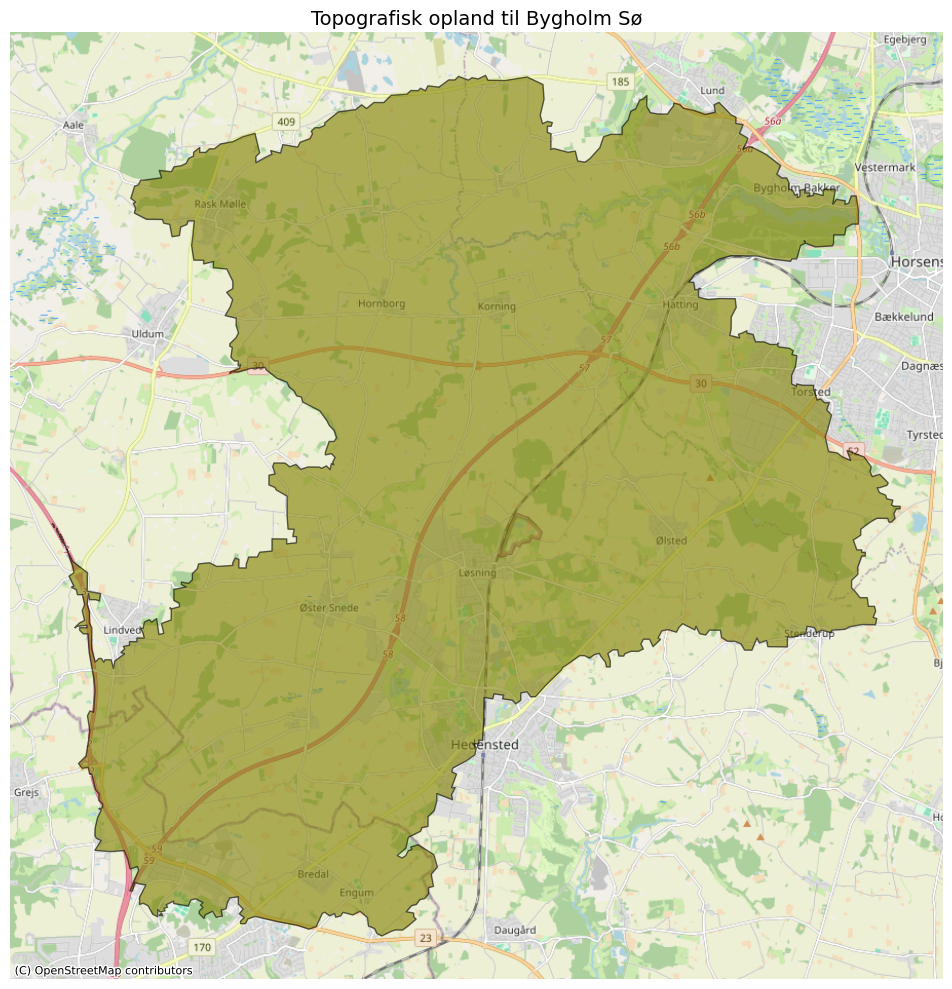

In [6]:
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt
import fiona
import contextily as ctx

# Sti til shapefilen (udpakket mappe)
shapefile_path = "Download_Terrain_Buildings__flooded__Schüttesvej/Download_Terrain_Buildings__flooded__Schüttesvej.shp"


# Brug fiona til at læse geometri og attributter uden fejl
with fiona.open(shapefile_path) as src:
    crs = src.crs
    records = list(src)

# Udpak geometrien og attributdata manuelt
geoms = []
props = []

for feature in records:
    geom = shape(feature["geometry"])
    if geom.geom_type == "MultiPolygon":
        for part in geom.geoms:
            geoms.append(part)
            props.append(feature["properties"])
    else:
        geoms.append(geom)
        props.append(feature["properties"])

# Lav GeoDataFrame
gdf = gpd.GeoDataFrame(props, geometry=geoms, crs=crs)

# Konverter til Web Mercator for baggrundskort
gdf_web = gdf.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf_web.plot(ax=ax, color="olive", edgecolor="black", alpha=0.6)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Topografisk opland til Bygholm Sø", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()